<h3>seaborn 라이브러리 - 고급 그래프 도구

-matplotlib 기능과 스타일을 확장한 차이썬 시각화 도구의 고급버전

-seaborn 라이브러리 임포트: sns

In [1]:
#라이브러리 불러오기
import seaborn as sns

#타이타닉 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#타이타닉 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

-회귀선이 있는 산점도

regplot(): 서로 다른 두개의 연속 변수 사이의 산점도를 그리고 선형회귀분석에 의한 회귀선을 나타냄.

fit_reg = False 하면 회귀선 안 보임

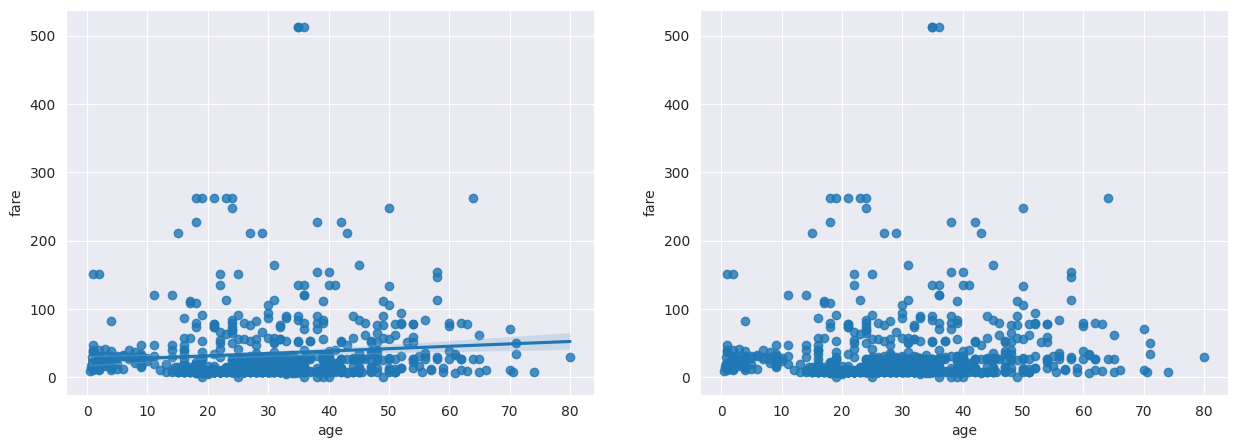

In [3]:
#라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

#시본 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정 다섯가지(darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

#그래프 객체 생성(피규어에 두개의 서브 플롯 생성)
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',
            y='fare',
            data=titanic,
            ax=ax1)

#그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',
            y='fare',
            data=titanic,
            ax=ax2,
            fit_reg=False)

plt.show()

-히스토그램/커널 밀도 그래프: displot()

hist=False는 히스토그램 표시x

kde=False는 커널 밀도 그래프 표시x

<ipython-input-4-d2b6b38930fe>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'],ax=ax1)


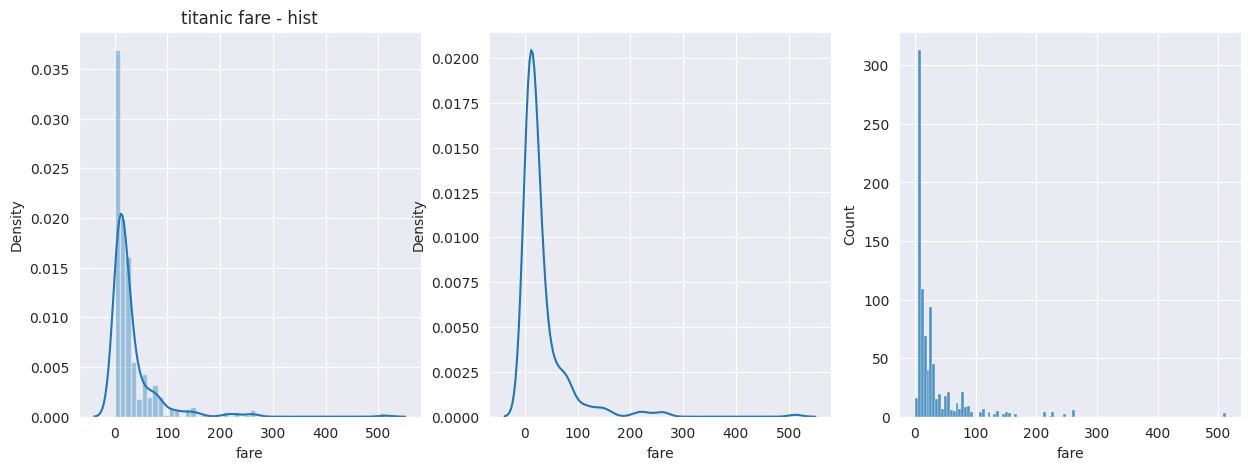

In [4]:
#그래프 객체 생성(figure에 세개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#distplot
sns.distplot(titanic['fare'],ax=ax1)

#kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2)

#histplo
sns.histplot(x ='fare', data=titanic, ax=ax3)

#차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax1.set_title('titanic fare - ked')
ax1.set_title('titanic fare - hist')

plt.show()

-히트맵

aggfunc = 'size' 는 데이터 값의 크기를 기준으로 집계한다는 것

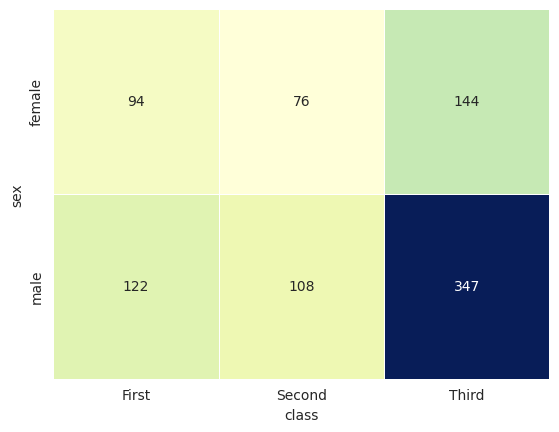

In [5]:
#피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

#히트맵 그리기
sns.heatmap(table,                  #데이터 프레임
            annot=True, fmt='d',    #데이터 값 표시여부, 정수형 포멧
            cmap='YlGnBu',          #컬러 맵
            linewidth = 0.5,        #구분 선
            cbar=False)             #컬러 바 표시 여부

plt.show()

-범주형 데이터의 산점도

stripplot(): 분산까지 고려하여 데이터 포인트가 서로 중복되지 않게 그림

swarmplot()

여기는 ' 가 아니라 "를 씀

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


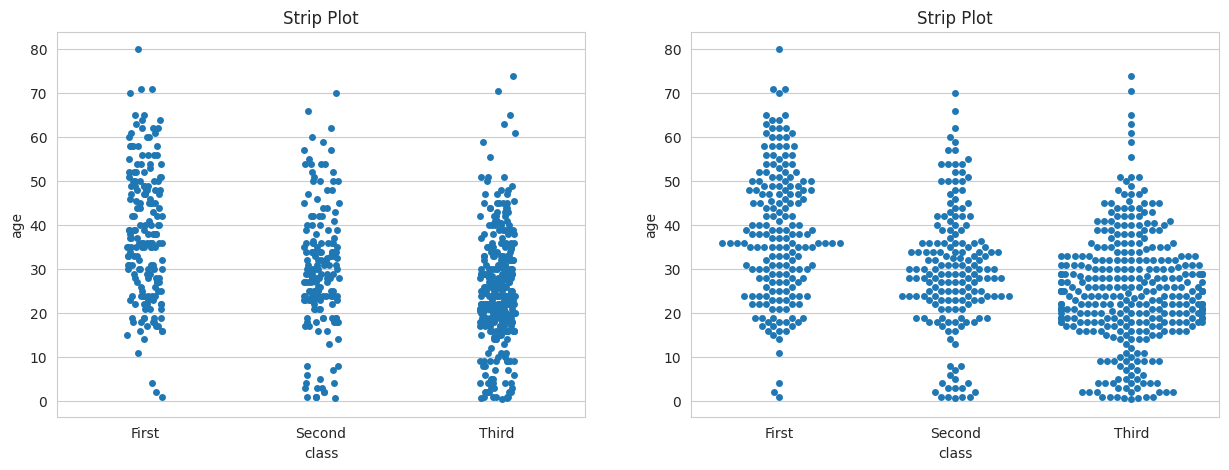

In [6]:
#라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

#시본 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정 다섯가지(darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#그래프 객체 생성(피규어에 두개의 서브 플롯 생성)
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#이산형 변수의 분포 - 데이터 분산 미고려 중복 표시 o
sns.stripplot(x="class",      #x축 변수
            y="age",        #y축 변수
            data=titanic,   #데이터 셋 - 데이터 프레임
            ax=ax1)         #axe객체 - 첫번째 그래프


#이산형 변수의 분포 - 데이터 분산 고려 중복 표시 x
sns.swarmplot(x="class",      #x축 변수
            y="age",        #y축 변수
            data=titanic,   #데이터 셋 - 데이터 프레임
            ax=ax2)         #axe객체 - 두번째 그래프

#차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

-막대 그래프

barplot()

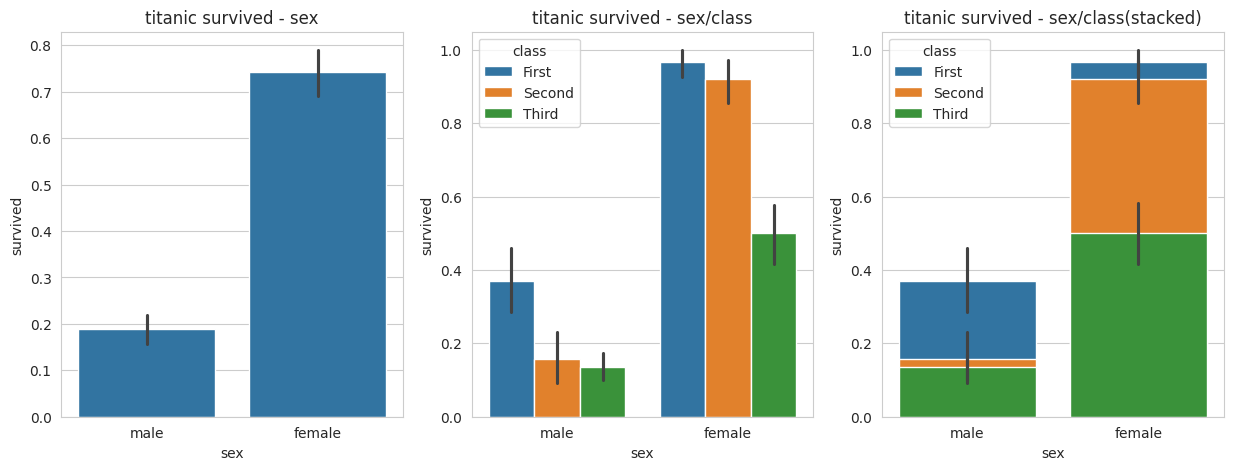

In [7]:
#그래프 객체 생성(피규어에 세개의 서브 플롯 생성)
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#x, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

#x, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

#x,y축에 변수 할당하고 hue옵션 추가해서 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

#차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

-빈도 그래프

countplot()

<ipython-input-8-5d5e4838dcc1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', palette = 'Set1', data=titanic, ax=ax1)


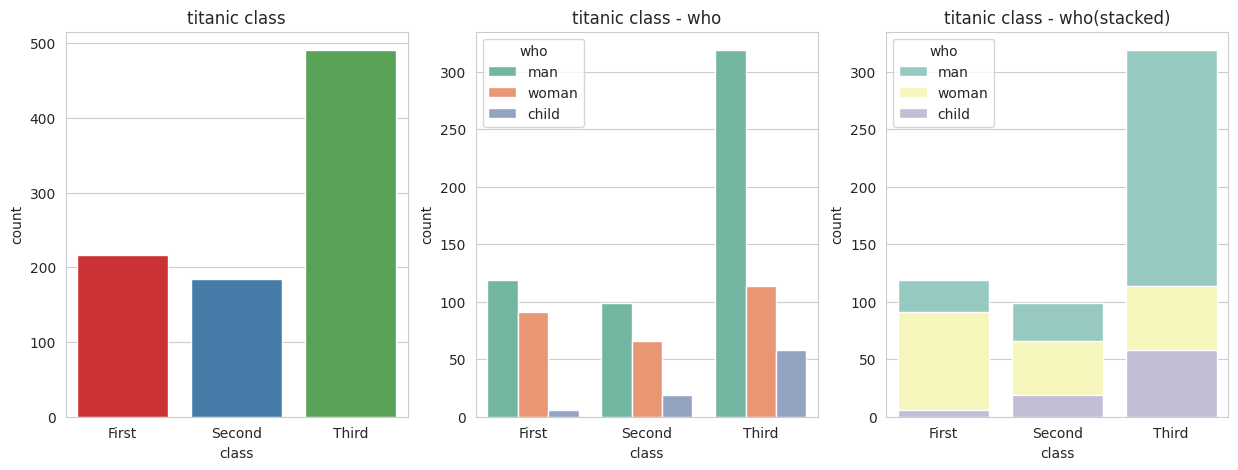

In [8]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#기본값
sns.countplot(x='class', palette = 'Set1', data=titanic, ax=ax1)

#hue 옵션에 'who' 추가
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)

#dodge=False 옵션 추가(축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge= False, data=titanic, ax=ax3)

#차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

-박스 플롯/바이올린 그래프

boxplot(), violinplot()

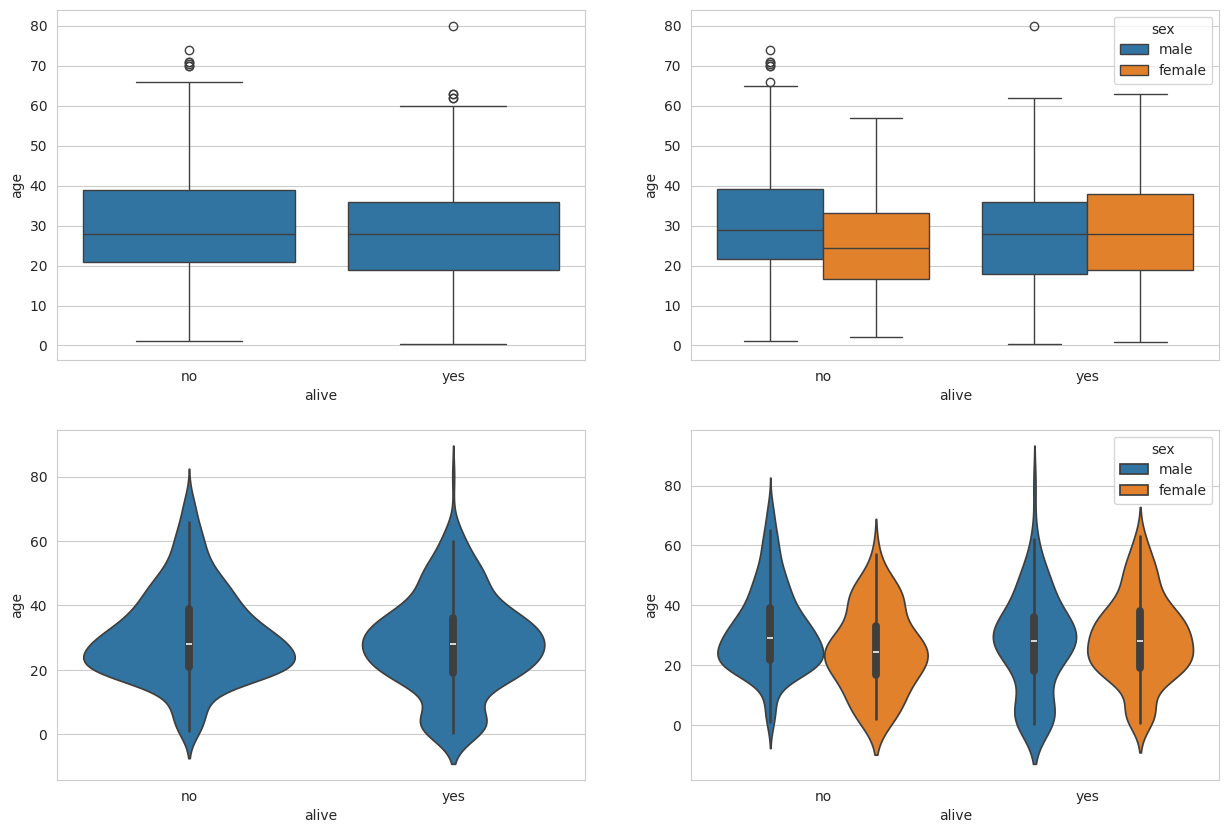

In [9]:
#라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

#시본 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정 다섯가지(darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#그래프 객체 생성(피규어에 네개의 서브 플롯 생성)
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#박스 플롯 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

#바이올린 그래프 - 휴 변수 추가
sns.boxplot(x='alive', y='age', hue = 'sex', data=titanic, ax=ax2)

#박스 플롯 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)

#바이올린 그래프 - 휴 변수 추가
sns.violinplot(x='alive', y='age', hue = 'sex', data=titanic, ax=ax4)

plt.show()

-조인트 그래프

jointplot()

회귀선 추가 kind=reg

육각산점도 kind=hex

커널 밀집 그래프 kind=kde

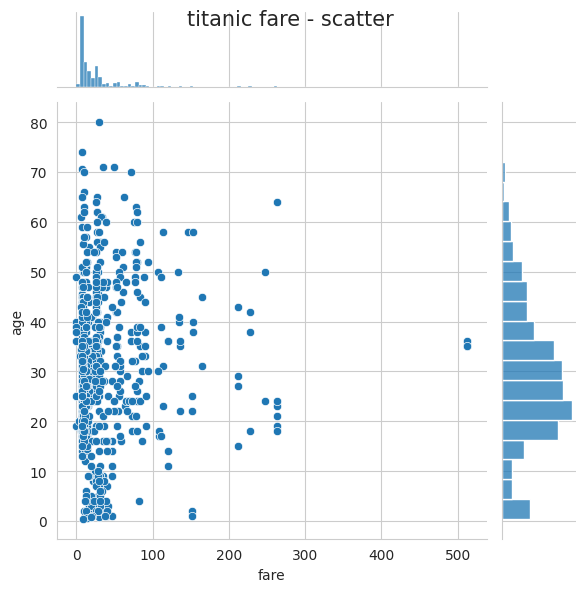

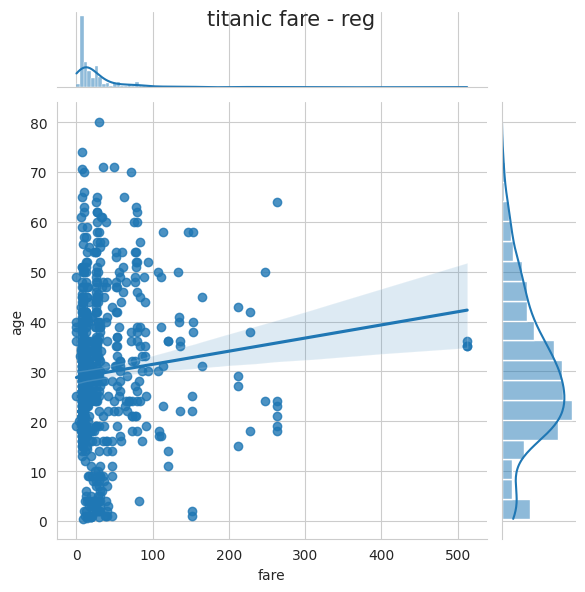

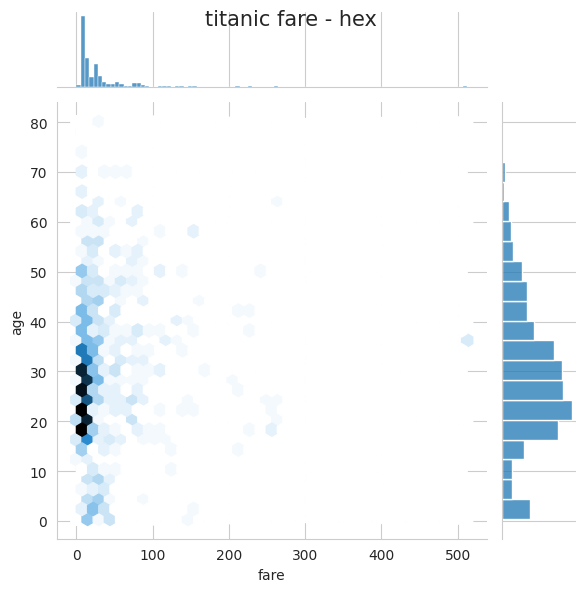

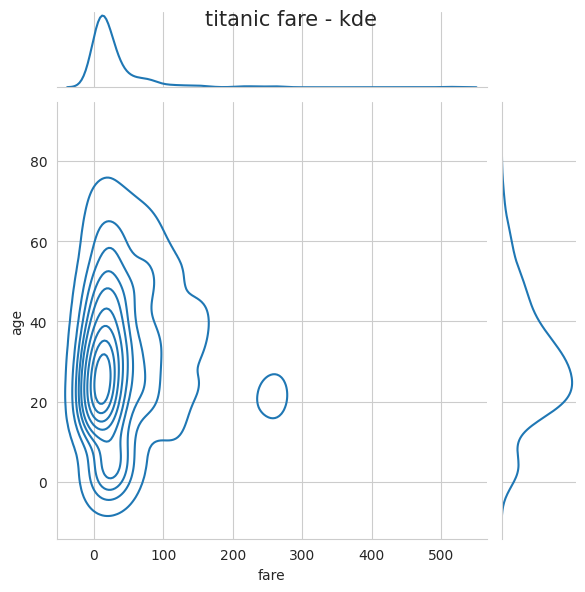

In [10]:
#라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

#시본 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정 다섯가지(darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#조인트 그래프 - 산점도 기본값
j1 = sns.jointplot(x='fare', y='age', data=titanic)

#조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind = 'reg', data=titanic)

#조인트 그래프 - 육각 그랲
j3 = sns.jointplot(x='fare', y='age', kind = 'hex', data=titanic)

#조인트 그래프 - 회귀선
j4 = sns.jointplot(x='fare', y='age', kind = 'kde', data=titanic)

#차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

-조건을 적용하여 화면을 그리드로 분할하기

FacetGrid(): 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯을 만든다.

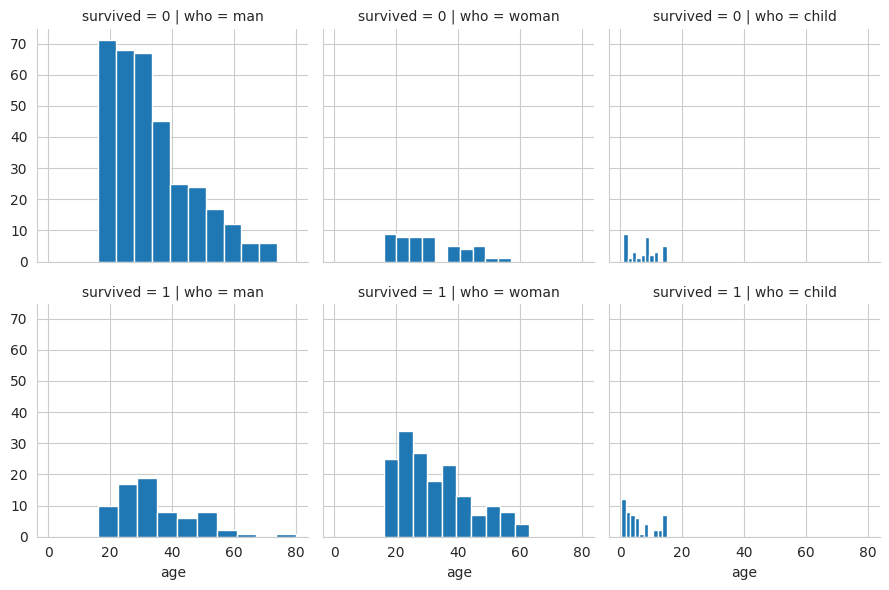

In [11]:
#라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

#시본 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정 다섯가지(darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived')

#ㄱ래프 적용하기
g=  g.map(plt.hist, 'age')

-이변수 데이터의 분포

pairplot(): 인자로 전달되는 데이터프레임의 열(변수)을 두개씩 짝을 지을 수 있는 모든 조합에 대해 표현한다.

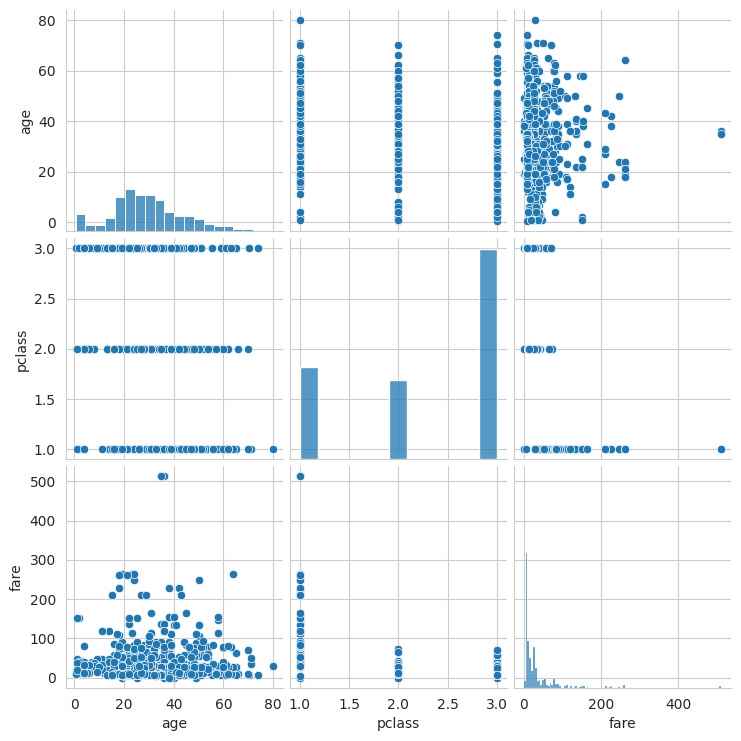

In [12]:
#타이타닉 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age', 'pclass', 'fare']]

#조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

<h3> Folium 라이브러리 - 지도 활용

지도 위에 시각화할 때 유용한 도구

지도를 보려면 지도 객체에 save()를 적용하여 HTML파일로 저장하고 웹브라우저에서 파일 열어 확인

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
#라이브러리 불러오기
import folium

#서울 지도 만들기
seoul_map = folium.Map(location = [37.55,126.98], zoom_start = 12)

#지도를 HTML파일로 저장하기
seoul_map.save('/content/drive/MyDrive/ESAA/data/seoul.html')

seoul_map

-지도 스타일 적용하기

Map()에 tiles 옵션을 적용

In [15]:
#라이브러리 불러오기
import folium

#서울 지도 만들기
seoul_map2 = folium.Map(location = [37.55,126.98], tiles='Stamen Terrain',
                        zoom_start = 12)
seoul_map3 = folium.Map(location = [37.55,126.98], tiles='Stamen Toner',
                        zoom_start = 15)

#지도를 HTML파일로 저장하기
seoul_map2.save('/content/drive/MyDrive/ESAA/data/seoul2.html')
seoul_map3.save('/content/drive/MyDrive/ESAA/data/seoul3.html')

seoul_map2
seoul_map3

-지도에 마커 표시하기

In [16]:
#라이브러리 불러오기
import folium
import pandas as pd

#대학교 리스트를 데이터프레임으로 전환

df = pd.read_excel('/content/drive/MyDrive/ESAA/data/서울지역 대학교 위치.zip', engine='openpyxl')

#서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                       zoom_start = 12)

#대학교 위치 정보를 Marker로 표시
for name, lat, lng, in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)

#지도를 HTML파일로 저장하기
seoul_map.save('/content/drive/MyDrive/ESAA/data/seoul_colleges.html')

seoul_map

In [17]:
#대학교 위치 정보를 CircleMarker로 표시
for name, lat, lng, in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius = 10,
                        color='brown',
                        fill = True,
                        fill_color = 'coral',
                        fill_opacity = 0.7,
                        popup=name
    ).add_to(seoul_map)

#지도를 HTML 파일로 저장하기
seoul_map.save('/content/drive/MyDrive/ESAA/data/seoul_colleges2.html')

seoul_map

-지도 영역에 단계구분도 표시하기

Choropleth()

In [ ]:
#라이브러리 불러오기
import folium
import pandas as pd
import json

#경기도 인구변화 데이터를 불러와서 데이터 프레임으로 변환
file_path = '/content/drive/MyDrive/ESAA/data/경기도인구데이터.zip'
df = pd.read_excel(file_path, index_col = '구분', engine = 'openpyxl')
df.columns = df.columns.map(str)

#경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = '/content/drive/MyDrive/ESAA/data/경기도행정구역경계.json'
try:
  geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
  geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

#경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982],
                   tiles = 'Stamen Terrain', zoom_start=9)

#출력할 연도 선택(2007-2017년 중에서 선택)
year = '2007'

#Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data = geo_data,                        #지도경계
                  data = df[year],                            #표시하려는 데이터
                  columns = [df.index, df[year]],             # 열지정
                  fill_colors = 'YlOrRd', fill_opacity = 0.7, line_opacity=0.3,
                  threshold_scale = [10000,10000,30000, 50000, 70000],
                  key_on = 'feature.properties.name',
                  ).add_to(g_map)

#지도를 HTML 파일로 저장하기
g_map.save('./gyonggi_population_'+year+'.html')